## Tennis Team Project 
### Markdown 
 + Overarching question: What factors have the most impact on winning? 
    + We will answer the above question through a classification system.

In [40]:
import os
import numpy as np
import pandas as pd

#Load Data
file_dir = './repos/atp-matches-dataset/'
data_list = []
for file in os.listdir(file_dir):
     data_list.append(pd.read_csv(file_dir + file))
        
df = pd.concat(data_list, ignore_index=True)

In [41]:
df[df['tourney_id'].str.contains('a',na=False)]

tourney_id tourney_name surface draw_size tourney_level  \
34437      Bernard Tomic            R     193       AUS       23.2033   
34439        Marin Cilic            R     198       CRO       27.2663   
34440      Lucas Pouille            R     NaN       FRA       21.8617   
34442       Tobias Kamke            R     180       GER       29.6235   
34445        Denis Kudla            R     180       USA       23.3812   
...                  ...          ...     ...       ...           ...   
37820    Karen Khachanov            R     NaN       RUS       20.6954   
37821    Daniil Medvedev            R     NaN       RUS       20.9692   
37822     Nenad Zimonjic            R     190       SRB       40.6571   
37823  Marco Chiudinelli            R     185       SUI       35.3895   
37824    Henri Laaksonen            R     NaN       SUI        24.835   

       tourney_date  match_num                  winner_id  winner_seed  \
34437          18.0     1675.0              7-6(5) 7-6(5)          3.0   
34439          13.0     2405.0             2-6 7-6(4) 6-4          3.0   
34440          78.0      672.0                    6-4 6-4          3.0   
34442         277.0      185.0                    6-2 6-1          3.0   
34445          69.0      719.0                    6-3 6-2          3.0   
...             ...        ...                        ...          ...   
37820          52.0      904.0  6-4 6-7(3) 6-3 1-6 7-6(6)          5.0   
37821          63.0      749.0        3-6 6-4 6-1 1-0 RET          3.0   
37822           NaN        NaN                   Walkover          3.0   
37823         146.0      414.0                6-4 6-3 6-1          5.0   
37824         127.0      473.0         4-6 6-2 6-2 7-6(1)          5.0   

      winner_entry  ... w_bpFaced l_ace  l_df l_svpt  l_1stIn  l_1stWon  \
34437           SF  ...       NaN   NaN   NaN    NaN      NaN       NaN   
34439           QF  ...       NaN   NaN   NaN    NaN      NaN       NaN   
34440           QF  ...       NaN   NaN   NaN    NaN      NaN       NaN   
34442          R16  ...       NaN   NaN   NaN    NaN      NaN       NaN   
34445          R16  ...       NaN   NaN   NaN    NaN      NaN       NaN   
...            ...  ...       ...   ...   ...    ...      ...       ...   
37820           RR  ...       NaN   NaN   NaN    NaN      NaN       NaN   
37821           RR  ...       NaN   NaN   NaN    NaN      NaN       NaN   
37822           RR  ...       NaN   NaN   NaN    NaN      NaN       NaN   
37823           RR  ...       NaN   NaN   NaN    NaN      NaN       NaN   
37824           RR  ...       NaN   NaN   NaN    NaN      NaN       NaN   

       l_2ndWon  l_SvGms  l_bpSaved l_bpFaced  
34437       NaN      NaN        NaN       NaN  
34439       NaN      NaN        NaN       NaN  
34440       NaN      NaN        NaN       NaN  
34442       NaN      NaN        NaN       NaN  
34445       NaN      NaN        NaN       NaN  
...         ...      ...        ...       ...  
37820       NaN      NaN        NaN       NaN  
37821       NaN      NaN        NaN       NaN  
37822       NaN      NaN        NaN       NaN  
37823       NaN      NaN        NaN       NaN  
37824       NaN      NaN        NaN       NaN  

[2658 rows x 49 columns]

## DATA CLEANING

In [42]:
#Dropping invalid rows and columns
check=['l_ace']
cleandata=df.dropna(subset=check)
cleandata.tail()

tourney_id tourney_name surface draw_size tourney_level  tourney_date  \
53264   2014-605  Tour Finals    Hard         8             F    20141109.0   
53265   2014-605  Tour Finals    Hard         8             F    20141109.0   
53266   2014-605  Tour Finals    Hard         8             F    20141109.0   
53267   2014-605  Tour Finals    Hard         8             F    20141109.0   
53268   2014-605  Tour Finals    Hard         8             F    20141109.0   

       match_num winner_id  winner_seed winner_entry  ... w_bpFaced l_ace  \
53264       10.0    105453          4.0          NaN  ...       9.0   2.0   
53265       11.0    103819          2.0          NaN  ...       4.0  10.0   
53266       12.0    104918          5.0          NaN  ...       1.0   4.0   
53267       14.0    104925          1.0          NaN  ...       4.0   3.0   
53268       13.0    103819          2.0          NaN  ...       6.0  10.0   

       l_df l_svpt  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved l_bpFaced  
53264   3.0   88.0     48.0      30.0      20.0     14.0        4.0       9.0  
53265   2.0   60.0     28.0      22.0      15.0      9.0        4.0       6.0  
53266   2.0   62.0     33.0      23.0      14.0     10.0        2.0       5.0  
53267   6.0   67.0     38.0      29.0       5.0     11.0        3.0       9.0  
53268   4.0  123.0     47.0      38.0      36.0     17.0        6.0       9.0  

[5 rows x 49 columns]

In [43]:
cleandata.shape

(44451, 49)

## CREATING COLUMNS

In [44]:
#Creating new columns for LvL, LvR, RvL, and RvR
add_columns=cleandata
add_columns['lvl']=np.nan
add_columns['lvr']=np.nan
add_columns['rvl']=np.nan
add_columns['rvr']=np.nan

for i in add_columns.index:
    if add_columns.loc[i,'winner_hand'] is 'L':
        if add_columns.loc[i, 'loser_hand'] is 'L':
            add_columns.loc[i, 'lvl'] = 1
        else: 
            add_columns.loc[i, 'lvl'] = 1
    else:
        if add_columns.loc[i, 'loser_hand'] is 'L':
            add_columns.loc[i, 'rvr'] = 1
        else:
            add_columns.loc[i, 'rvr'] = 1
add_columns.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

tourney_id tourney_name surface draw_size tourney_level  tourney_date  \
0   2008-338       Sydney    Hard        32             A    20080107.0   
1   2008-338       Sydney    Hard        32             A    20080107.0   
2   2008-338       Sydney    Hard        32             A    20080107.0   
3   2008-338       Sydney    Hard        32             A    20080107.0   
4   2008-338       Sydney    Hard        32             A    20080107.0   

   match_num winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        1.0    104755          1.0          NaN  ...    41.0     29.0   
1        2.0    104098          NaN          NaN  ...    37.0     23.0   
2        3.0    103206          NaN          NaN  ...    63.0     34.0   
3        4.0    104269          8.0          NaN  ...    54.0     35.0   
4        5.0    102148          NaN          NaN  ...    31.0     21.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  lvl  lvr  rvl  rvr  
0      11.0    10.0        1.0        3.0  NaN  NaN  NaN  1.0  
1       7.0     9.0        2.0        6.0  NaN  NaN  NaN  1.0  
2      20.0    13.0        6.0       11.0  NaN  NaN  NaN  1.0  
3      19.0    13.0        8.0       13.0  1.0  NaN  NaN  NaN  
4      10.0    10.0        2.0        7.0  NaN  NaN  NaN  1.0  

[5 rows x 53 columns]

In [45]:
#inserting zero where there is not data for the new inserted columns
add_columns['lvl'].fillna(0, inplace=True)
add_columns['lvr'].fillna(0, inplace=True)
add_columns['rvl'].fillna(0, inplace=True)
add_columns['rvr'].fillna(0, inplace=True)

add_columns.head()

tourney_id tourney_name surface draw_size tourney_level  tourney_date  \
0   2008-338       Sydney    Hard        32             A    20080107.0   
1   2008-338       Sydney    Hard        32             A    20080107.0   
2   2008-338       Sydney    Hard        32             A    20080107.0   
3   2008-338       Sydney    Hard        32             A    20080107.0   
4   2008-338       Sydney    Hard        32             A    20080107.0   

   match_num winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        1.0    104755          1.0          NaN  ...    41.0     29.0   
1        2.0    104098          NaN          NaN  ...    37.0     23.0   
2        3.0    103206          NaN          NaN  ...    63.0     34.0   
3        4.0    104269          8.0          NaN  ...    54.0     35.0   
4        5.0    102148          NaN          NaN  ...    31.0     21.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  lvl  lvr  rvl  rvr  
0      11.0    10.0        1.0        3.0  0.0  0.0  0.0  1.0  
1       7.0     9.0        2.0        6.0  0.0  0.0  0.0  1.0  
2      20.0    13.0        6.0       11.0  0.0  0.0  0.0  1.0  
3      19.0    13.0        8.0       13.0  1.0  0.0  0.0  0.0  
4      10.0    10.0        2.0        7.0  0.0  0.0  0.0  1.0  

[5 rows x 53 columns]

## CREATING A NEW DATAFRAME

In [46]:
#Seeing whether or not we can create a unique ID using tourney_id and match_num colums
add_columns.groupby(['tourney_id'])['match_num'].count()

tourney_id
2000-301    31
2000-306    31
2000-308    30
2000-311    55
2000-314    30
            ..
2015-741    47
2015-747    31
2015-773    27
2015-807    31
2015-891    27
Name: match_num, Length: 1072, dtype: int64

In [47]:
#creating a new column for a unique ID 
add_columns['unique_id'] = df.tourney_id.astype(str) + df.match_num.astype(str)

print (add_columns)

      tourney_id tourney_name surface draw_size tourney_level  tourney_date  \
0       2008-338       Sydney    Hard        32             A    20080107.0   
1       2008-338       Sydney    Hard        32             A    20080107.0   
2       2008-338       Sydney    Hard        32             A    20080107.0   
3       2008-338       Sydney    Hard        32             A    20080107.0   
4       2008-338       Sydney    Hard        32             A    20080107.0   
...          ...          ...     ...       ...           ...           ...   
53264   2014-605  Tour Finals    Hard         8             F    20141109.0   
53265   2014-605  Tour Finals    Hard         8             F    20141109.0   
53266   2014-605  Tour Finals    Hard         8             F    20141109.0   
53267   2014-605  Tour Finals    Hard         8             F    20141109.0   
53268   2014-605  Tour Finals    Hard         8             F    20141109.0   

       match_num winner_id  winner_seed winner_entr

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
keep = ['winner_id','loser_id','winner_hand','loser_hand', 'winner_seed','loser_seed','unique_id','lvl','lvr','rvl','rvr', 'winner_age', 'loser_age']

In [49]:
add_columns['winner_age'].fillna(19, inplace=True)
add_columns['loser_age'].fillna(19, inplace=True)


In [50]:
new_df = add_columns[keep]

In [51]:
new_df['playerA_win'] = 1
new_df['winner_older'] = np.nan
for i in new_df.index:
    #values = []
    if (new_df.loc[i, 'winner_age'] >= new_df.loc[i, 'loser_age']):
        new_df.loc[i, 'winner_older'] = 1
        

new_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


winner_id  loser_id winner_hand loser_hand  winner_seed  loser_seed  \
0    104755  104214.0           R          R          1.0         NaN   
1    104098  104527.0           R          R          NaN         NaN   
2    103206  103429.0           R          R          NaN         NaN   
3    104269  103852.0           L          L          8.0         NaN   
4    102148  103484.0           R          R          NaN         3.0   

     unique_id  lvl  lvr  rvl  rvr  winner_age  loser_age  playerA_win  \
0  2008-3381.0  0.0  0.0  0.0  1.0   21.555099  24.484600            1   
1  2008-3382.0  0.0  0.0  0.0  1.0   25.070500  22.778919            1   
2  2008-3383.0  0.0  0.0  0.0  1.0   29.609856  28.353183            1   
3  2008-3384.0  1.0  0.0  0.0  0.0   24.145106  26.297057            1   
4  2008-3385.0  0.0  0.0  0.0  1.0   35.077344  28.027379            1   

   winner_older  
0           NaN  
1           1.0  
2           1.0  
3           NaN  
4           1.0

In [52]:
new2_df = add_columns
new2_df['unique_id'] = df.tourney_id.astype(str) + df.match_num.astype(str)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
new3_df = new2_df[keep]
new3_df['playerA_win'] = 0
for i in new_df.index:
    #values = []
    if (new3_df.loc[i, 'winner_age'] >= new3_df.loc[i, 'loser_age']):
        new3_df.loc[i, 'winner_older'] = 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
new_df = new_df.rename(columns={"winner_id": "playerA", "loser_id": "playerB", "winner_hand": "playerA_hand", "loser_hand" : "playerB_hand", "winner_seed": "playerA_seed", "loser_seed": "playerB_seed", "winner_age": "playerA_age", "loser_age": "playerB_age"})
new3_df = new3_df.rename(columns = {"loser_id": "playerA", "winner_id": "playerB", "loser_hand": "playerA_hand", "winner_hand" : "playerB_hand", "winner_seed": "playerB_seed", "loser_seed": "playerA_seed", "winner_age": "playerB_age", "loser_age": "playerA_age"})

In [55]:
new3_df.head(5)

playerB   playerA playerB_hand playerA_hand  playerB_seed  playerA_seed  \
0  104755  104214.0            R            R           1.0           NaN   
1  104098  104527.0            R            R           NaN           NaN   
2  103206  103429.0            R            R           NaN           NaN   
3  104269  103852.0            L            L           8.0           NaN   
4  102148  103484.0            R            R           NaN           3.0   

     unique_id  lvl  lvr  rvl  rvr  playerB_age  playerA_age  playerA_win  \
0  2008-3381.0  0.0  0.0  0.0  1.0    21.555099    24.484600            0   
1  2008-3382.0  0.0  0.0  0.0  1.0    25.070500    22.778919            0   
2  2008-3383.0  0.0  0.0  0.0  1.0    29.609856    28.353183            0   
3  2008-3384.0  1.0  0.0  0.0  0.0    24.145106    26.297057            0   
4  2008-3385.0  0.0  0.0  0.0  1.0    35.077344    28.027379            0   

   winner_older  
0           NaN  
1           1.0  
2           1.0  
3           NaN  
4           1.0

In [56]:
frames = [new_df , new3_df]

In [57]:
test_df = pd.concat(frames)
test_df.sort_values(by='unique_id',ascending = True ).head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


lvl  lvr playerA  playerA_age playerA_hand  playerA_seed  playerA_win  \
48447  0.0  0.0  101543    31.137577            L           NaN            0   
48447  0.0  0.0  103163    21.771389            R           1.0            1   
48456  0.0  0.0  103082    22.140999            R           NaN            0   
48456  0.0  0.0  102494    25.078713            R           NaN            1   
48457  0.0  0.0  102227    26.603696            R           NaN            0   

      playerB  playerB_age playerB_hand  playerB_seed  rvl  rvr     unique_id  \
48447  103163    21.771389            R           1.0  0.0  1.0   2000-3011.0   
48447  101543    31.137577            L           NaN  0.0  1.0   2000-3011.0   
48456  102494    25.078713            R           NaN  0.0  1.0  2000-30110.0   
48456  103082    22.140999            R           NaN  0.0  1.0  2000-30110.0   
48457  103292    21.086927            R           NaN  0.0  1.0  2000-30111.0   

       winner_older  
48447           NaN  
48447           NaN  
48456           1.0  
48456           1.0  
48457           NaN

In [58]:
test_df.describe()

lvl      lvr   playerA_age  playerA_seed   playerA_win  \
count  88902.000000  88902.0  88902.000000  31460.000000  88902.000000   
mean       0.119750      0.0     26.116468      7.810362      0.500000   
std        0.324671      0.0      3.582119      6.916040      0.500003   
min        0.000000      0.0     15.430527      1.000000      0.000000   
25%        0.000000      0.0     23.509925      3.000000      0.000000   
50%        0.000000      0.0     26.036961      6.000000      0.500000   
75%        0.000000      0.0     28.610541     10.000000      1.000000   
max        1.000000      0.0     44.060233     35.000000      1.000000   

        playerB_age  playerB_seed      rvl           rvr  winner_older  
count  88902.000000  31460.000000  88902.0  88902.000000       43066.0  
mean      26.116468      7.810362      0.0      0.880250           1.0  
std        3.582119      6.916040      0.0      0.324671           0.0  
min       15.430527      1.000000      0.0      0.000000           1.0  
25%       23.509925      3.000000      0.0      1.000000           1.0  
50%       26.036961      6.000000      0.0      1.000000           1.0  
75%       28.610541     10.000000      0.0      1.000000           1.0  
max       44.060233     35.000000      0.0      1.000000           1.0

In [59]:
test_df.shape

(88902, 15)

In [60]:
test_df['playerA_seed'].fillna(-999, inplace=True)
test_df['playerB_seed'].fillna(-999, inplace=True)
test_df['winner_older'].fillna(-999, inplace=True)

test_df.head()

lvl  lvr playerA  playerA_age playerA_hand  playerA_seed  playerA_win  \
0  0.0  0.0  104755    21.555099            R           1.0            1   
1  0.0  0.0  104098    25.070500            R        -999.0            1   
2  0.0  0.0  103206    29.609856            R        -999.0            1   
3  1.0  0.0  104269    24.145106            L           8.0            1   
4  0.0  0.0  102148    35.077344            R        -999.0            1   

  playerB  playerB_age playerB_hand  playerB_seed  rvl  rvr    unique_id  \
0  104214    24.484600            R        -999.0  0.0  1.0  2008-3381.0   
1  104527    22.778919            R        -999.0  0.0  1.0  2008-3382.0   
2  103429    28.353183            R        -999.0  0.0  1.0  2008-3383.0   
3  103852    26.297057            L        -999.0  0.0  0.0  2008-3384.0   
4  103484    28.027379            R           3.0  0.0  1.0  2008-3385.0   

   winner_older  
0        -999.0  
1           1.0  
2           1.0  
3        -999.0  
4           1.0

In [61]:
test_df.dtypes

lvl             float64
lvr             float64
playerA          object
playerA_age     float64
playerA_hand     object
playerA_seed    float64
playerA_win       int64
playerB          object
playerB_age     float64
playerB_hand     object
playerB_seed    float64
rvl             float64
rvr             float64
unique_id        object
winner_older    float64
dtype: object

In [62]:
#change_me = test_df['playerA', 'playerB']
test_df[['playerA', 'playerB']] = test_df[['playerA', 'playerB']].apply(pd.to_numeric)
#test_df.dtypes

In [63]:
test_df.head()

lvl  lvr  playerA  playerA_age playerA_hand  playerA_seed  playerA_win  \
0  0.0  0.0   104755    21.555099            R           1.0            1   
1  0.0  0.0   104098    25.070500            R        -999.0            1   
2  0.0  0.0   103206    29.609856            R        -999.0            1   
3  1.0  0.0   104269    24.145106            L           8.0            1   
4  0.0  0.0   102148    35.077344            R        -999.0            1   

    playerB  playerB_age playerB_hand  playerB_seed  rvl  rvr    unique_id  \
0  104214.0    24.484600            R        -999.0  0.0  1.0  2008-3381.0   
1  104527.0    22.778919            R        -999.0  0.0  1.0  2008-3382.0   
2  103429.0    28.353183            R        -999.0  0.0  1.0  2008-3383.0   
3  103852.0    26.297057            L        -999.0  0.0  0.0  2008-3384.0   
4  103484.0    28.027379            R           3.0  0.0  1.0  2008-3385.0   

   winner_older  
0        -999.0  
1           1.0  
2           1.0  
3        -999.0  
4           1.0

In [64]:
cleandata['surface'].count()
#this shows no NA values to fret about

44451

In [65]:
cleandata.groupby(['surface']).count()

tourney_id  tourney_name  draw_size  tourney_level  tourney_date  \
surface                                                                     
Carpet         1420          1420       1420           1420          1420   
Clay          14664         14664      14664          14664         14664   
Grass          4905          4905       4905           4905          4905   
Hard          23462         23462      23462          23462         23462   

         match_num  winner_id  winner_seed  winner_entry  winner_name  ...  \
surface                                                                ...   
Carpet        1420       1420          570           213         1420  ...   
Clay         14664      14664         6514          1996        14664  ...   
Grass         4905       4905         2284           665         4905  ...   
Hard         23462      23462        11137          2963        23462  ...   

         l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  l_bpFaced    lvl    lvr  \
surface                                                                    
Carpet       1420      1420     1420       1420       1420   1420   1420   
Clay        14664     14664    14664      14664      14664  14664  14664   
Grass        4905      4905     4905       4905       4905   4905   4905   
Hard        23462     23462    23462      23462      23462  23462  23462   

           rvl    rvr  unique_id  
surface                           
Carpet    1420   1420       1420  
Clay     14664  14664      14664  
Grass     4905   4905       4905  
Hard     23462  23462      23462  

[4 rows x 53 columns]

In [66]:
# here I am making binary columns to cover the sruface types of the matches
surface_columns = cleandata
surface_columns['grass_win'] = np.nan
surface_columns['clay_win'] = np.nan
surface_columns['carpet_win'] = np.nan
surface_columns['hard_win'] = np.nan

grass_cols = surface_columns[surface_columns['surface'].str.contains("rass")]
grass_cols['grass_win'].fillna(1, inplace=True)

clay_cols = surface_columns[surface_columns['surface'].str.contains("lay")]
clay_cols['clay_win'].fillna(1, inplace=True)

carpet_cols = surface_columns[surface_columns['surface'].str.contains("arpet")]
carpet_cols['carpet_win'].fillna(1, inplace=True)

hard_cols = surface_columns[surface_columns['surface'].str.contains("ard")]
hard_cols['hard_win'].fillna(1, inplace=True)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [67]:
stack_these = [grass_cols, clay_cols, carpet_cols, hard_cols]

In [68]:
surface_columns = pd.concat(stack_these)
#look_here = test_this

surface_columns['clay_win'].fillna(0, inplace=True)
surface_columns['carpet_win'].fillna(0, inplace=True)
surface_columns['grass_win'].fillna(0, inplace=True)
surface_columns['hard_win'].fillna(0, inplace=True)


surface_columns.groupby(['surface']).count()

tourney_id  tourney_name  draw_size  tourney_level  tourney_date  \
surface                                                                     
Carpet         1420          1420       1420           1420          1420   
Clay          14664         14664      14664          14664         14664   
Grass          4905          4905       4905           4905          4905   
Hard          23462         23462      23462          23462         23462   

         match_num  winner_id  winner_seed  winner_entry  winner_name  ...  \
surface                                                                ...   
Carpet        1420       1420          570           213         1420  ...   
Clay         14664      14664         6514          1996        14664  ...   
Grass         4905       4905         2284           665         4905  ...   
Hard         23462      23462        11137          2963        23462  ...   

         l_bpFaced    lvl    lvr    rvl    rvr  unique_id  grass_win  \
surface                                                                
Carpet        1420   1420   1420   1420   1420       1420       1420   
Clay         14664  14664  14664  14664  14664      14664      14664   
Grass         4905   4905   4905   4905   4905       4905       4905   
Hard         23462  23462  23462  23462  23462      23462      23462   

         clay_win  carpet_win  hard_win  
surface                                  
Carpet       1420        1420      1420  
Clay        14664       14664     14664  
Grass        4905        4905      4905  
Hard        23462       23462     23462  

[4 rows x 57 columns]

In [69]:
surface_columns['unique_id'] = cleandata.tourney_id.astype(str) + cleandata.match_num.astype(str)

In [70]:
keep = ['clay_win', 'carpet_win', 'grass_win', 'hard_win', 'unique_id']

In [71]:
to_merge_df = surface_columns[keep]

In [72]:
to_merge_df.shape

(44451, 5)

In [73]:
trying_merges = test_df

In [74]:
trying_merges.shape

(88902, 15)

In [75]:
trying_merges = trying_merges.merge(to_merge_df, how = 'inner', on = 'unique_id')
trying_merges.groupby(['grass_win']).count()
# this is double the normal grass win from before, this is good! 

lvl    lvr  playerA  playerA_age  playerA_hand  playerA_seed  \
grass_win                                                                   
0.0        79100  79100    79100        79100         79100         79100   
1.0         9810   9810     9810         9810          9810          9810   

           playerA_win  playerB  playerB_age  playerB_hand  playerB_seed  \
grass_win                                                                  
0.0              79100    79100        79100         79100         79100   
1.0               9810     9810         9810          9810          9810   

             rvl    rvr  unique_id  winner_older  clay_win  carpet_win  \
grass_win                                                                
0.0        79100  79100      79100         79100     79100       79100   
1.0         9810   9810       9810          9810      9810        9810   

           hard_win  
grass_win            
0.0           79100  
1.0            9810

In [76]:
trying_merges.head()

lvl  lvr  playerA  playerA_age playerA_hand  playerA_seed  playerA_win  \
0  0.0  0.0   104755    21.555099            R           1.0            1   
1  0.0  0.0   104214    24.484600            R        -999.0            0   
2  0.0  0.0   104098    25.070500            R        -999.0            1   
3  0.0  0.0   104527    22.778919            R        -999.0            0   
4  0.0  0.0   103206    29.609856            R        -999.0            1   

    playerB  playerB_age playerB_hand  playerB_seed  rvl  rvr    unique_id  \
0  104214.0    24.484600            R        -999.0  0.0  1.0  2008-3381.0   
1  104755.0    21.555099            R           1.0  0.0  1.0  2008-3381.0   
2  104527.0    22.778919            R        -999.0  0.0  1.0  2008-3382.0   
3  104098.0    25.070500            R        -999.0  0.0  1.0  2008-3382.0   
4  103429.0    28.353183            R        -999.0  0.0  1.0  2008-3383.0   

   winner_older  clay_win  carpet_win  grass_win  hard_win  
0        -999.0       0.0         0.0        0.0       1.0  
1        -999.0       0.0         0.0        0.0       1.0  
2           1.0       0.0         0.0        0.0       1.0  
3           1.0       0.0         0.0        0.0       1.0  
4           1.0       0.0         0.0        0.0       1.0

In [77]:
test_df = trying_merges

In [78]:
test_df.shape

(88910, 19)

In [79]:
test_df.head()

lvl  lvr  playerA  playerA_age playerA_hand  playerA_seed  playerA_win  \
0  0.0  0.0   104755    21.555099            R           1.0            1   
1  0.0  0.0   104214    24.484600            R        -999.0            0   
2  0.0  0.0   104098    25.070500            R        -999.0            1   
3  0.0  0.0   104527    22.778919            R        -999.0            0   
4  0.0  0.0   103206    29.609856            R        -999.0            1   

    playerB  playerB_age playerB_hand  playerB_seed  rvl  rvr    unique_id  \
0  104214.0    24.484600            R        -999.0  0.0  1.0  2008-3381.0   
1  104755.0    21.555099            R           1.0  0.0  1.0  2008-3381.0   
2  104527.0    22.778919            R        -999.0  0.0  1.0  2008-3382.0   
3  104098.0    25.070500            R        -999.0  0.0  1.0  2008-3382.0   
4  103429.0    28.353183            R        -999.0  0.0  1.0  2008-3383.0   

   winner_older  clay_win  carpet_win  grass_win  hard_win  
0        -999.0       0.0         0.0        0.0       1.0  
1        -999.0       0.0         0.0        0.0       1.0  
2           1.0       0.0         0.0        0.0       1.0  
3           1.0       0.0         0.0        0.0       1.0  
4           1.0       0.0         0.0        0.0       1.0

## CREATING MODELS

In [82]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import pydotplus

In [172]:
feature_cols = ['playerA_seed','playerB_seed','lvl','lvr','rvl','rvr', 'clay_win', 'grass_win', 'carpet_win', 'hard_win', 'playerA_age', 'playerB_age', 'winner_older']
# here i am checking the new seeds, went back and changed all NA seeds to max because that makes sense. All this did
# in prior models was bring down accuracy, but it may add value to this. 
X = trying_merges[feature_cols] # Features
y = trying_merges.playerA_win # Target variable

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [174]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [175]:
df.sort_values(by = 'test', ascending = False)

levels  leaves     train      test
379       6     870  0.785417  0.783376
380       6     880  0.785417  0.783376
381       6     890  0.785321  0.783264
382       6     900  0.785080  0.782889
383       6     910  0.784903  0.782552
..      ...     ...       ...       ...
65        3     670  0.619712  0.617478
66        3     680  0.619712  0.617478
67        3     690  0.619712  0.617478
68        3     700  0.619712  0.617478
77        3     790  0.619712  0.617478

[392 rows x 4 columns]

In [176]:
# Create Decision Tree classifer object
best_model = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 870)
# I feel good about this... low depth, high min samples.

# Train Decision Tree Classifer
best_model = best_model.fit(X_train,y_train)
#this is actually a bad model... winner_older and player ages should not be modeled together

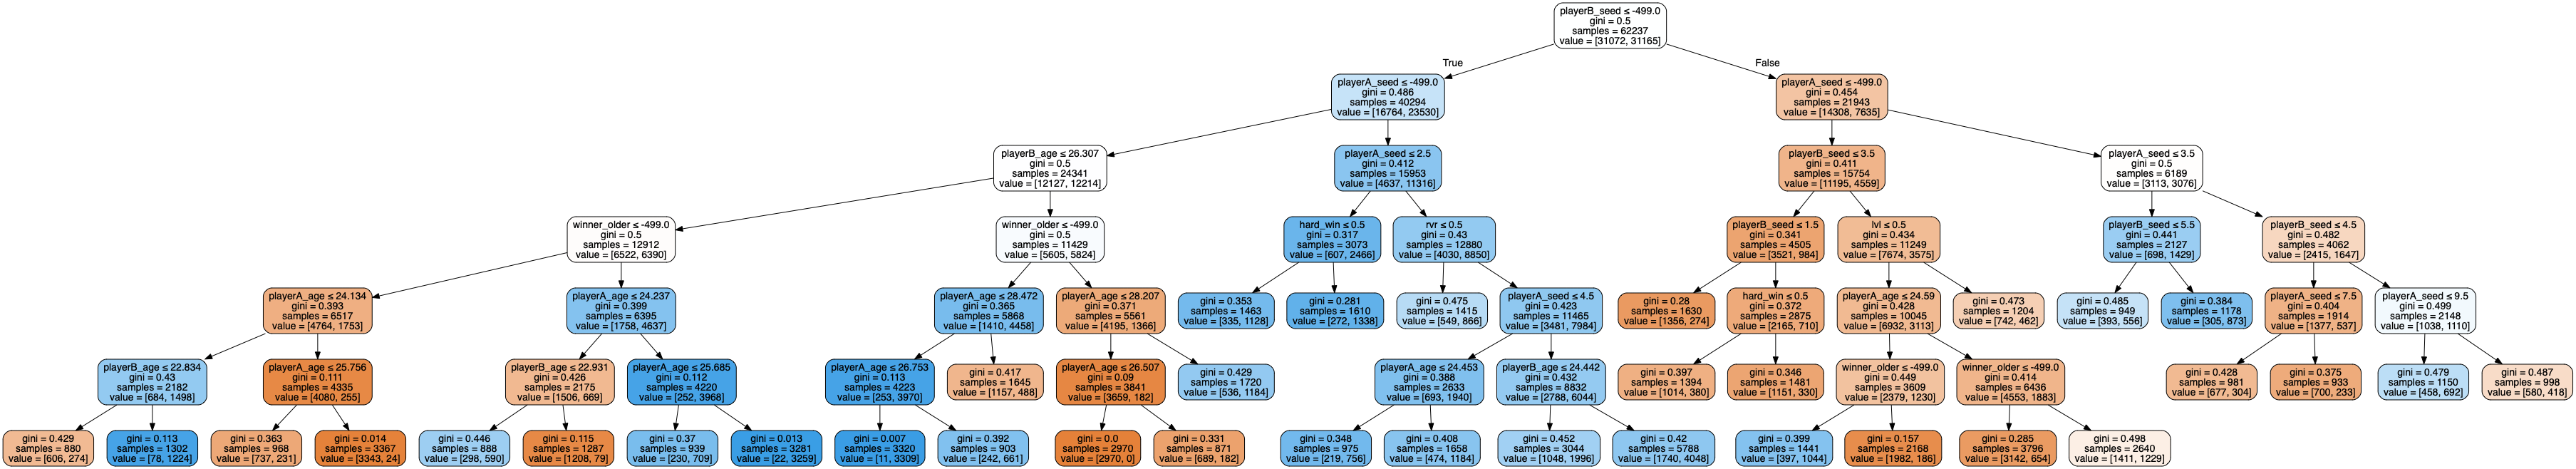

In [177]:
dot_data = StringIO()

export_graphviz(best_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [178]:
best_model.feature_importances_

array([0.12141176, 0.14282978, 0.00093104, 0.        , 0.        ,
       0.00142483, 0.        , 0.        , 0.        , 0.00072185,
       0.36446524, 0.06417041, 0.30404509])

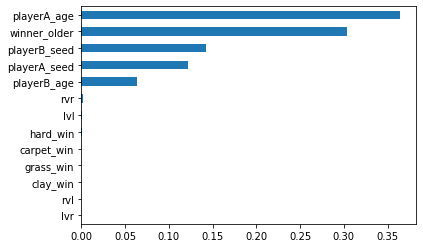

In [179]:
pd.Series(best_model.feature_importances_, index = feature_cols).sort_values().plot.barh()

In [161]:
feature_cols = ['playerA_seed','playerB_seed','lvl','lvr','rvl','rvr', 'clay_win', 'grass_win', 'carpet_win', 'hard_win', 'winner_older']
# here i am checking the new seeds, went back and changed all NA seeds to max because that makes sense. All this did
# in prior models was bring down accuracy, but it may add value to this. 
X = trying_merges[feature_cols] # Features
y = trying_merges.playerA_win # Target variable

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [163]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [164]:
df.sort_values(by = 'test', ascending = False)

levels  leaves     train      test
196       5      20  0.624805  0.619465
197       5      30  0.624805  0.619465
199       5      50  0.624805  0.619465
200       5      60  0.624805  0.619465
201       5      70  0.624805  0.619465
..      ...     ...       ...       ...
69        3     710  0.619985  0.616841
70        3     720  0.619985  0.616841
71        3     730  0.619985  0.616841
72        3     740  0.619985  0.616841
0         3      20  0.619985  0.616841

[392 rows x 4 columns]

In [165]:
# Create Decision Tree classifer object
all_features_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 20)
# I feel good about this... low depth, high min samples.

# Train Decision Tree Classifer
all_features_model = all_features_model.fit(X_train,y_train)

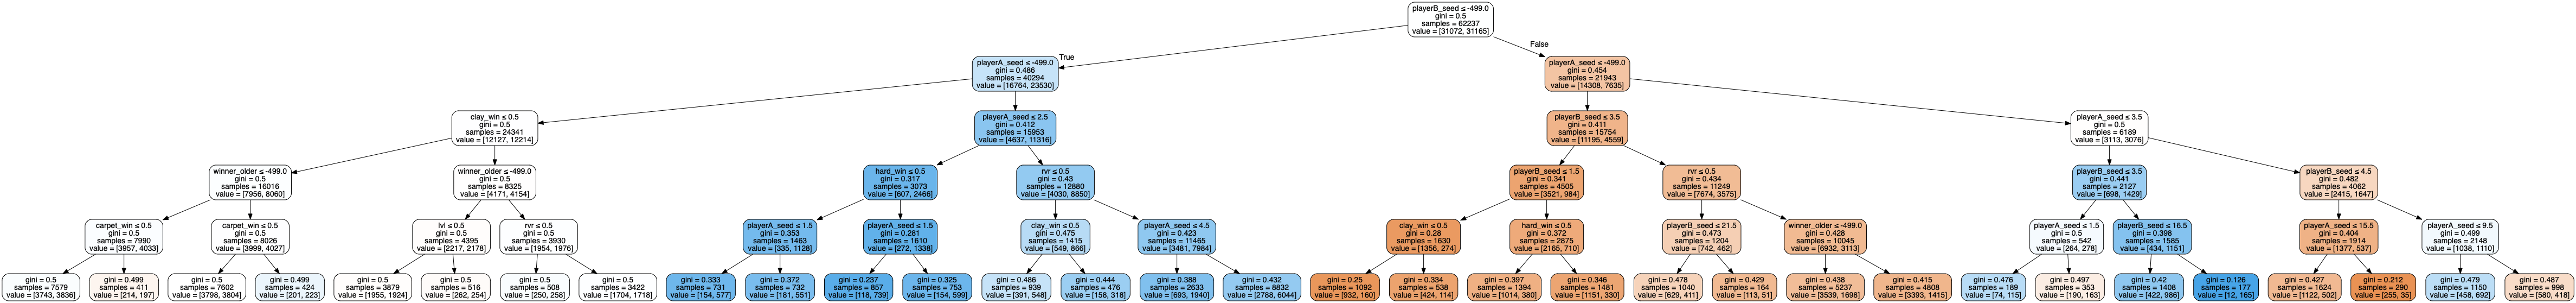

In [166]:
dot_data = StringIO()

export_graphviz(all_features_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [167]:
all_features_model.feature_importances_

array([4.52150712e-01, 5.32572793e-01, 3.74435559e-06, 0.00000000e+00,
       0.00000000e+00, 8.64730422e-03, 2.26928835e-03, 0.00000000e+00,
       3.16155570e-04, 2.64689602e-03, 1.39310639e-03])

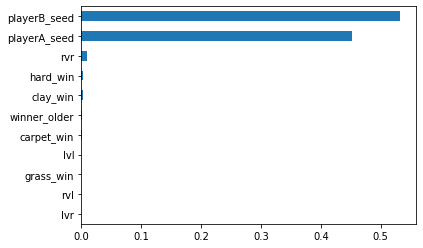

In [168]:
pd.Series(all_features_model.feature_importances_, index = feature_cols).sort_values().plot.barh()

In [169]:
acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

test acc 0.6180407153301091, 
train acc 0.6245320307855455


In [170]:
pred_labels_test = all_features_model.predict(X_test)


In [171]:
# roc Auc score 
test_auc = roc_auc_score(y_test, preds_test)
print('test AUC {}'.format(test_auc))

# classifcation Report 
report = classification_report(y_test, pred_labels_test)
print(report)

# confusion Matrix
cm = confusion_matrix(y_test, pred_labels_test)

print('TN, FP \n FN TP')
print(cm)

test AUC 0.6183532003557628
              precision    recall  f1-score   support

           0       0.66      0.51      0.57     13383
           1       0.60      0.73      0.66     13290

    accuracy                           0.62     26673
   macro avg       0.63      0.62      0.61     26673
weighted avg       0.63      0.62      0.61     26673

TN, FP 
 FN TP
[[6759 6624]
 [3526 9764]]


In [ ]:
## this is the model we used in our presentation

In [150]:
feature_cols = ['playerA_seed','playerB_seed','lvl','lvr','rvl','rvr', 'clay_win', 'grass_win', 'carpet_win', 'hard_win', 'playerA_age', 'playerB_age']
# here i am checking the new seeds, went back and changed all NA seeds to max because that makes sense. All this did
# in prior models was bring down accuracy, but it may add value to this. 
X = trying_merges[feature_cols] # Features
y = trying_merges.playerA_win # Target variable

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [152]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [153]:
df.sort_values(by = 'test', ascending = False)

levels  leaves     train      test
216       5     220  0.626380  0.628013
217       5     230  0.626332  0.628013
218       5     240  0.626299  0.627938
220       5     260  0.626380  0.627901
219       5     250  0.626380  0.627901
..      ...     ...       ...       ...
78        3     800  0.619712  0.617478
77        3     790  0.619712  0.617478
76        3     780  0.619712  0.617478
75        3     770  0.619712  0.617478
49        3     510  0.619712  0.617478

[392 rows x 4 columns]

In [154]:
# Create Decision Tree classifer object
player_ages_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 220)
# I feel good about this... low depth, high min samples.

# Train Decision Tree Classifer
player_ages_model = player_ages_model.fit(X_train,y_train)

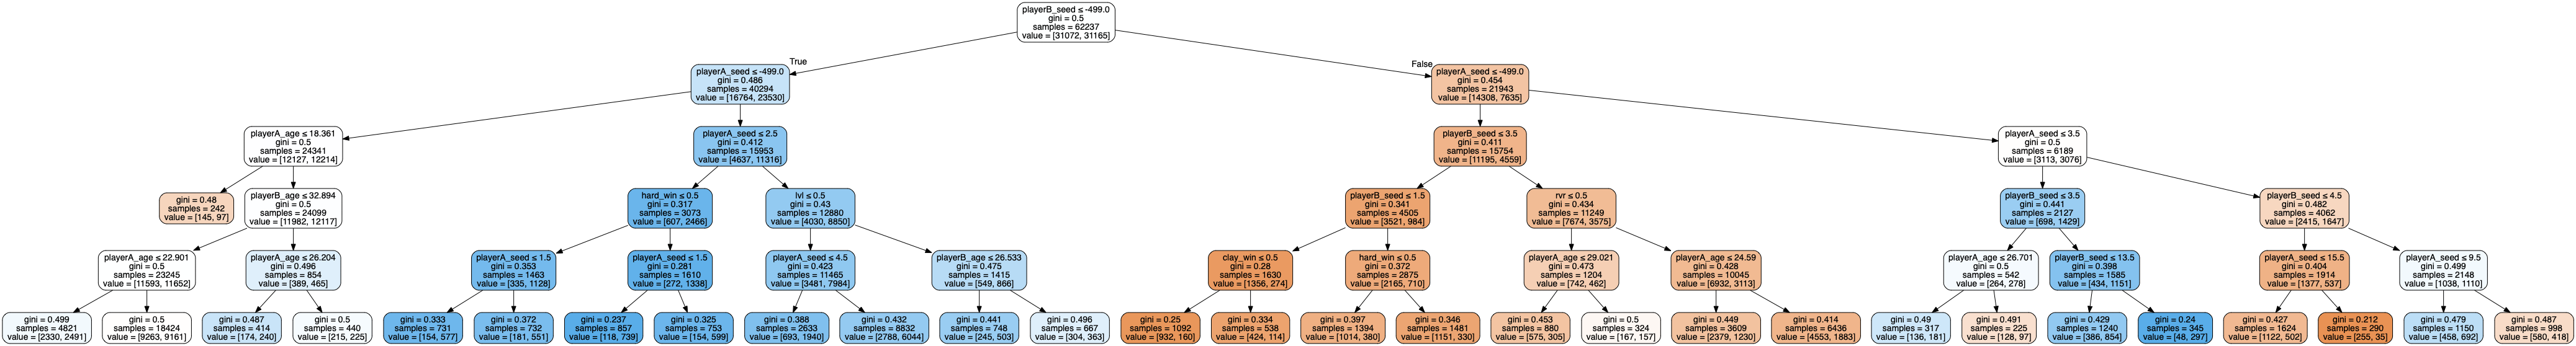

In [155]:
dot_data = StringIO()

export_graphviz(player_ages_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [156]:
player_ages_model.feature_importances_

array([0.44661986, 0.52701623, 0.00517836, 0.        , 0.        ,
       0.00338375, 0.0008898 , 0.        , 0.        , 0.00262348,
       0.0100505 , 0.00423802])

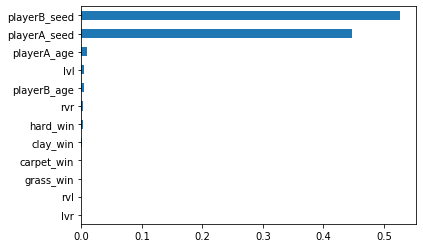

In [157]:
pd.Series(player_ages_model.feature_importances_, index = feature_cols).sort_values().plot.barh()

In [158]:
acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

test acc 0.6263637386120796, 
train acc 0.6302842360653631


In [159]:
pred_labels_test = player_ages_model.predict(X_test)


In [160]:
# roc Auc score 
test_auc = roc_auc_score(y_test, preds_test)
print('test AUC {}'.format(test_auc))

# classifcation Report 
report = classification_report(y_test, pred_labels_test)
print(report)

# confusion Matrix
cm = confusion_matrix(y_test, pred_labels_test)

print('TN, FP \n FN TP')
print(cm)

test AUC 0.6266240365248928
              precision    recall  f1-score   support

           0       0.61      0.74      0.67     13383
           1       0.66      0.51      0.58     13290

    accuracy                           0.63     26673
   macro avg       0.63      0.63      0.62     26673
weighted avg       0.63      0.63      0.62     26673

TN, FP 
 FN TP
[[9920 3463]
 [6459 6831]]


In [113]:
feature_cols = ['lvl','lvr','rvl','rvr', 'clay_win', 'grass_win', 'carpet_win', 'hard_win','playerA_age', 'playerB_age']
# here i am checking the new seeds, went back and changed all NA seeds to max because that makes sense. All this did
# in prior models was bring down accuracy, but it may add value to this. 
X = trying_merges[feature_cols] # Features
y = trying_merges.playerA_win # Target variable

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [115]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [116]:
df.sort_values(by = 'test', ascending = False)

levels  leaves     train      test
333       6     410  0.526777  0.521501
334       6     420  0.526777  0.521501
336       6     440  0.526680  0.521426
340       6     480  0.526407  0.521389
339       6     470  0.526407  0.521389
..      ...     ...       ...       ...
22        3     240  0.518004  0.512766
23        3     250  0.518004  0.512766
24        3     260  0.518004  0.512766
1         3      30  0.518004  0.512766
0         3      20  0.518004  0.512766

[392 rows x 4 columns]

In [117]:
# Create Decision Tree classifer object
no_seeds_model = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 410)
# I feel good about this... low depth, high min samples.

# Train Decision Tree Classifer
no_seeds_model = no_seeds_model.fit(X_train,y_train)

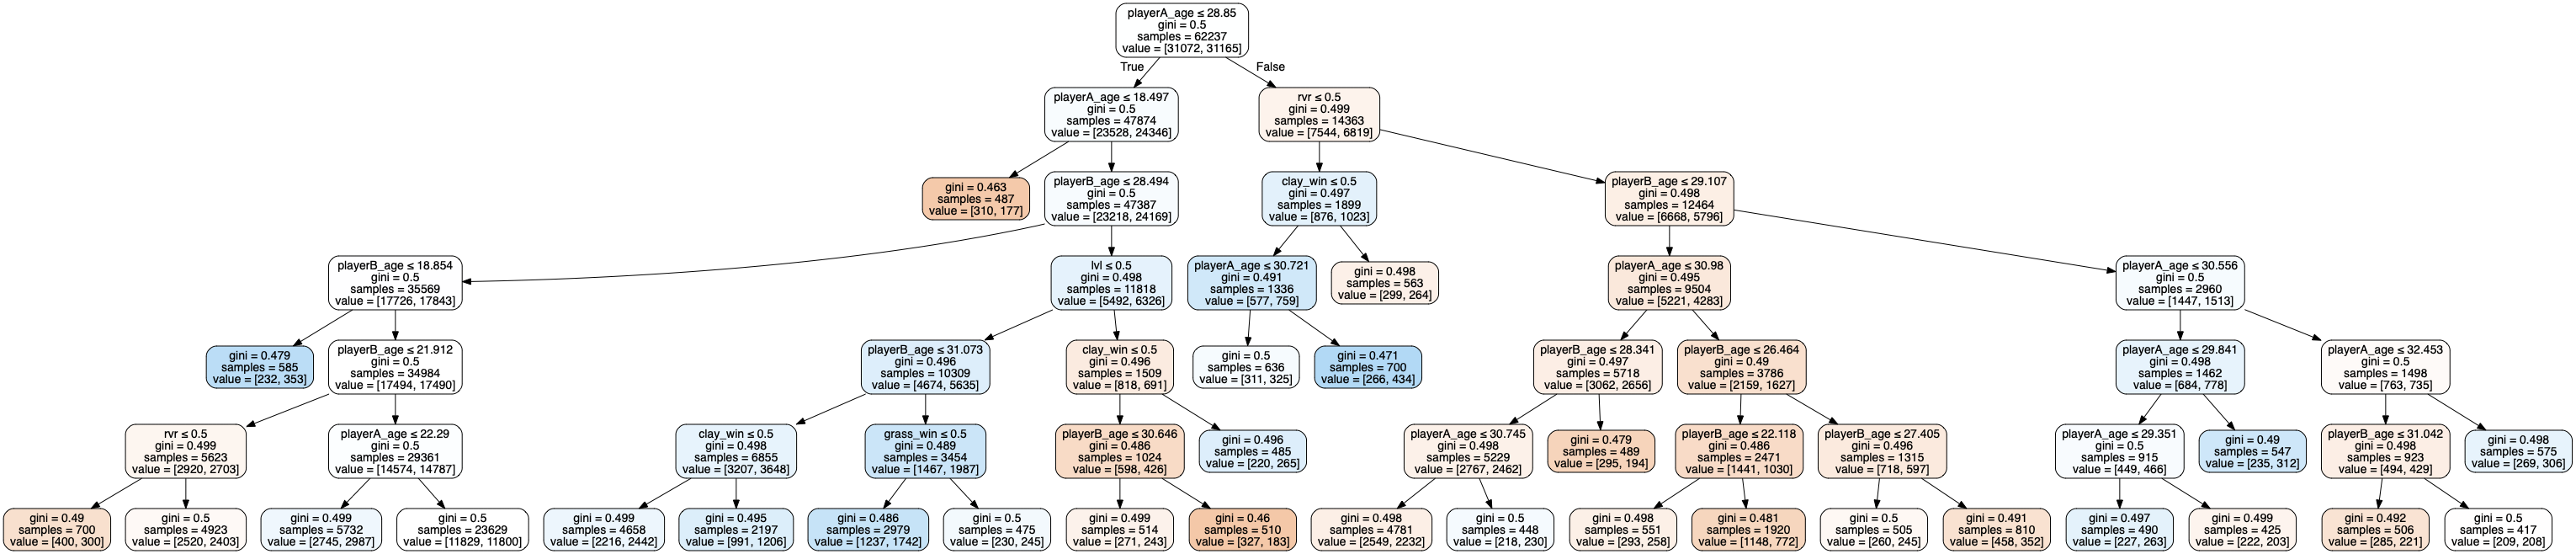

In [118]:
dot_data = StringIO()

export_graphviz(no_seeds_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [119]:
no_seeds_model.feature_importances_

array([0.09143484, 0.        , 0.        , 0.09820121, 0.09184372,
       0.01720931, 0.        , 0.        , 0.33288026, 0.36843067])

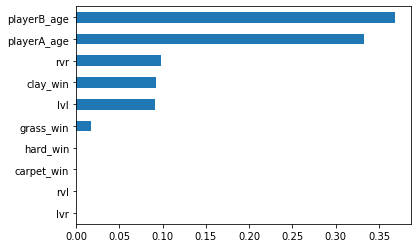

In [120]:
pd.Series(no_seeds_model.feature_importances_, index = feature_cols).sort_values().plot.barh()

In [121]:
acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

test acc 0.5192141866306752, 
train acc 0.5240612497389013


In [122]:
pred_labels_test = no_seeds_model.predict(X_test)


In [123]:
# roc Auc score 
test_auc = roc_auc_score(y_test, preds_test)
print('test AUC {}'.format(test_auc))

# classifcation Report 
report = classification_report(y_test, pred_labels_test)
print(report)

# confusion Matrix
cm = confusion_matrix(y_test, pred_labels_test)

print('TN, FP \n FN TP')
print(cm)

test AUC 0.518545848992413
              precision    recall  f1-score   support

           0       0.52      0.69      0.59     13383
           1       0.53      0.35      0.42     13290

    accuracy                           0.52     26673
   macro avg       0.52      0.52      0.51     26673
weighted avg       0.52      0.52      0.51     26673

TN, FP 
 FN TP
[[9234 4149]
 [8614 4676]]


In [124]:
feature_cols = ['playerA_seed','playerB_seed','lvl','lvr','rvl','rvr', 'clay_win', 'grass_win', 'carpet_win', 'hard_win']
# here i am checking the new seeds, went back and changed all NA seeds to max because that makes sense. All this did
# in prior models was bring down accuracy, but it may add value to this. 
X = trying_merges[feature_cols] # Features
y = trying_merges.playerA_win # Target variable

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [126]:
train_results = []
test_results = []
n_levels = []
leaf_mins = []
for i in range(3, 7):
    for j in range (20, 1000, 10):
        model = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j).fit(X_train,y_train)
        preds_test = model.predict(X_test)
        preds_train = model.predict(X_train)
        acc_test = accuracy_score(y_test, preds_test)
        acc_train = accuracy_score(y_train, preds_train)
        train_results.append(acc_train)
        test_results.append(acc_test)
        n_levels.append(i)
        leaf_mins.append(j)
    
our_stuff = {'levels': n_levels, 'leaves': leaf_mins, 'train': train_results, 'test': test_results}  
    
df = pd.DataFrame(our_stuff)

In [127]:
df.sort_values(by = 'test', ascending = False)

levels  leaves     train      test
309       6     170  0.624725  0.620890
308       6     160  0.624725  0.620890
310       6     180  0.624725  0.620890
307       6     150  0.624725  0.620890
306       6     140  0.624725  0.620890
..      ...     ...       ...       ...
50        3     520  0.619985  0.616841
49        3     510  0.619985  0.616841
48        3     500  0.619985  0.616841
47        3     490  0.619985  0.616841
0         3      20  0.619985  0.616841

[392 rows x 4 columns]

In [136]:
# Create Decision Tree classifer object
first_model = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 170)
# I feel good about this... low depth, high min samples.

# Train Decision Tree Classifer
first_model = first_model.fit(X_train,y_train)

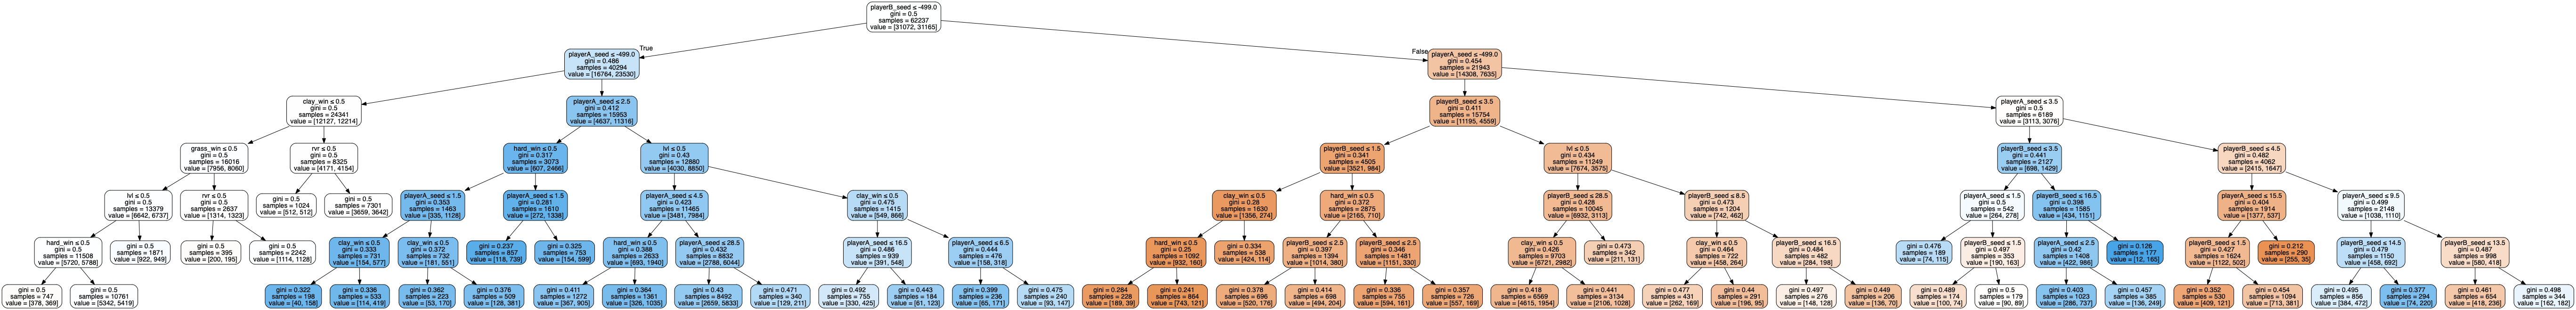

In [137]:
dot_data = StringIO()

export_graphviz(first_model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [138]:
first_model.feature_importances_

array([4.47301265e-01, 5.36726196e-01, 8.49596058e-03, 0.00000000e+00,
       0.00000000e+00, 1.78566101e-05, 3.81755850e-03, 4.28401348e-06,
       0.00000000e+00, 3.63687933e-03])

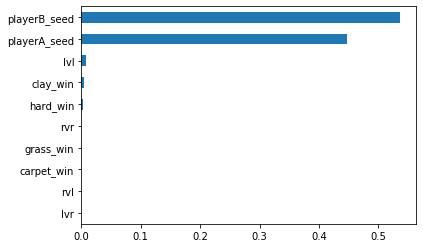

In [139]:
pd.Series(first_model.feature_importances_, index = feature_cols).sort_values().plot.barh()

In [140]:
acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

test acc 0.619877779027481, 
train acc 0.6237447177723862


In [141]:
pred_labels_test = first_model.predict(X_test)


In [142]:
# roc Auc score 
test_auc = roc_auc_score(y_test, preds_test)
print('test AUC {}'.format(test_auc))

# classifcation Report 
report = classification_report(y_test, pred_labels_test)
print(report)

# confusion Matrix
cm = confusion_matrix(y_test, pred_labels_test)

print('TN, FP \n FN TP')
print(cm)

test AUC 0.6201015270037845
              precision    recall  f1-score   support

           0       0.63      0.58      0.60     13383
           1       0.61      0.67      0.64     13290

    accuracy                           0.62     26673
   macro avg       0.62      0.62      0.62     26673
weighted avg       0.62      0.62      0.62     26673

TN, FP 
 FN TP
[[7718 5665]
 [4447 8843]]
